## Optimize LASSO score threshold

### Load packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from core.core import *

### Load data

In [3]:
pool_matrix = pd.read_excel('data/sensing_matrix_15drugs.xlsx')
pool_matrix = pool_matrix.fillna(0)

input_path = 'data/preprocessed/PL_HepG2_F.csv'
protein_table = pd.read_csv(input_path)
scores, fold_changes = post_analysis(protein_table, pool_matrix, klist = False, drug_num = 3)

kins = pd.read_csv('data/UniprotID_family-Kinase.txt', sep = '\t')
kins = kins['ID'].values
atpb = pd.read_csv('data/UniprotID_ATPbinding.txt', sep = '\t')
atpb = atpb['ID'].values
tars = np.union1d(kins, atpb)
print(len(tars))

100%|█████████████████████████████████████████████████████████████████████████████| 4056/4056 [00:15<00:00, 260.55it/s]

2428


### Set threshold range 0.05 - 0.3

In [4]:
x, y1, y2 = [], [], []
idkins = {}
falpos = {}
for thres in np.round(np.arange(0.05, 0.3, 0.05),2):
    tab = scores
    sig = tab[tab['Staurosporine'] >= thres]['Accession'].values
    trues = np.intersect1d(sig, tars)
    falses = np.setdiff1d(sig, tars)
    idkins[thres] = list(trues)
    falpos[thres] = list(falses)
    x.append(thres)
    y1.append(len(trues))
    y2.append(len(falses))
    
df = pd.DataFrame(data={'kinase & ATP binding': y1, 'others': y2})
df.index = x

### Plot results

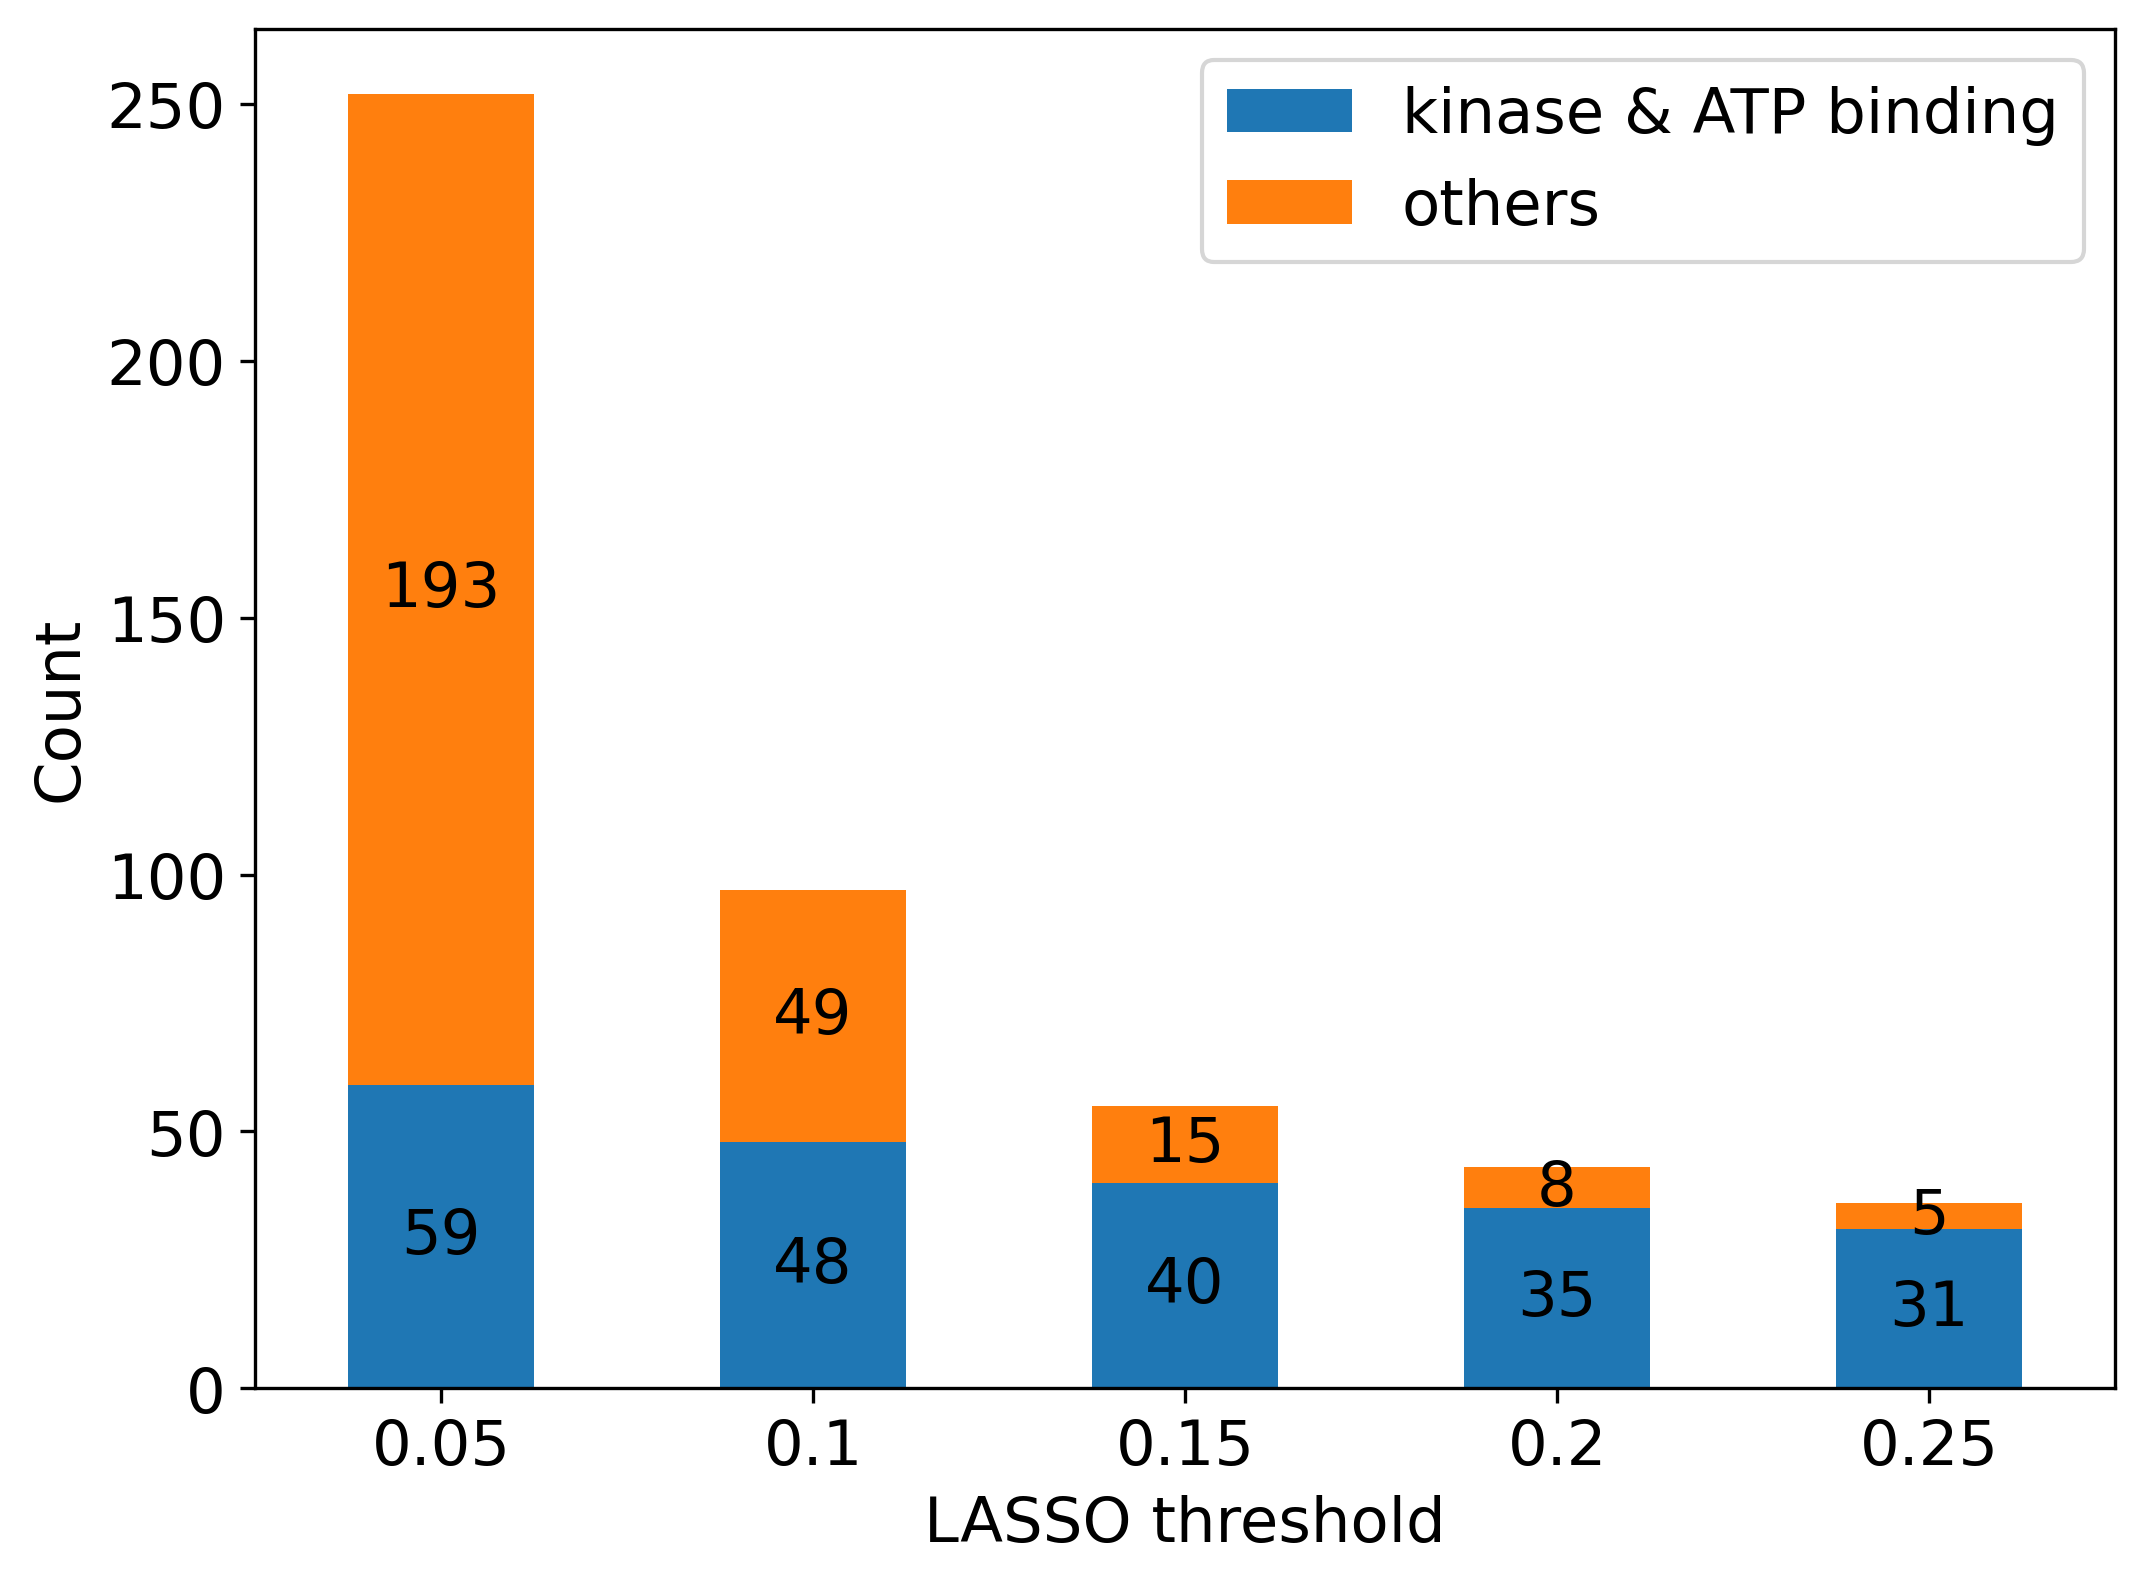

In [5]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 15
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='LASSO threshold', ylabel='Count')
for c in ax.containers:
    labels = np.round([v.get_height() if v.get_height() > 0 else '' for v in c]).astype(int)
    ax.bar_label(c, labels=labels, label_type='center')